#Contrastes de hipótesis

## Básicos del contraste de hipótesis

Las estimaciones puntuales y los intervalos de confianza son herramientas de inferencia básicas que actúan como base para otra técnica de inferencia: la prueba de contraste de hipótesis. Los contrastes de hipótesis son un marco para determinar si los datos observados se desvían de lo esperado. La biblioteca scipy.stats de Python contiene una serie de funciones que facilitan la realización de dichas pruebas.

Los contrastes de hipótesis se basan en una declaración llamada hipótesis nula que asume que no sucede nada interesante entre las variables que está probando. La forma exacta de la hipótesis nula varía de un tipo de prueba a otra: si se está probando si los grupos difieren, la hipótesis nula establece que los grupos son iguales. Por ejemplo, si quisiera probar si la edad promedio de los votantes en su estado de origen difiere del promedio nacional, la hipótesis nula sería que no hay diferencia entre las edades promedio.

El propósito de un contraste de hipótesis es determinar si es probable que la hipótesis nula sea cierta dados los datos de la muestra. Si hay poca evidencia en contra de la hipótesis nula dados los datos, acepta la hipótesis nula. Si la hipótesis nula es improbable dados los datos, se puede rechazar la hipótesis nula a favor de la hipótesis alternativa: "algo interesante está sucediendo". La forma exacta de la hipótesis alternativa dependerá de la prueba específica que esté realizando. Continuando con el ejemplo anterior, la hipótesis alternativa sería que la edad promedio de los votantes en su estado difiere del promedio nacional.

Una vez que se tenga a mano la hipótesis nula y alternativa, se elige un nivel de significación (a menudo indicado por la letra griega α). El nivel de significación es un umbral de probabilidad que determina cuándo se rechaza la hipótesis nula. Después de realizar una prueba, si la probabilidad de obtener un resultado tan extremo como el que observas debido al azar es menor que el nivel de significancia, se rechaza la hipótesis nula a favor de la alternativa. Esta probabilidad de ver un resultado como extremo o más extremo que el observado se conoce como valor p.

La prueba T es una prueba estadística utilizada para determinar si una muestra de datos numéricos difiere significativamente de la población o si dos muestras difieren entre sí.

A parte del t-test, también contamos con el z test. No obstante, este test se utiliza cuando nuestra población es normal y conocemos el valor de la varianza poblacional (poco probable).

In [1]:
from statsmodels.stats.weightstats import ztest as ztest
#ztest(dat1, dat2, value=0)

#T test con una población
Una prueba t de una muestra verifica si la media de una muestra difiere de la media de la población. Vamos a crear algunos datos de edad ficticios para la población de votantes en todo el país y una muestra de votantes en Minnesota y probar si la edad promedio de los votantes de Minnesota difiere de la población:

In [80]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from distfit import distfit

In [3]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


Se observa que usamos una combinación ligeramente diferente de distribuciones para generar los datos de muestra para Minnesota, por lo que sabemos que las dos medias son diferentes. Realicemos una prueba t con un nivel de confianza del 95% y veamos si rechaza correctamente la hipótesis nula de que la muestra proviene de la misma distribución que la población. Para realizar una prueba t de una muestra, podemos usar la función stats.ttest_1samp():

In [4]:
stats.ttest_1samp(a = minnesota_ages,               # Sample data
                 popmean = population_ages.mean())  # Pop mean

TtestResult(statistic=-2.5742714883655027, pvalue=0.013118685425061675, df=49)

El resultado de la prueba muestra que el estadístico "t" es igual a -2.574. Este estadístico nos dice cuánto se desvía la media muestral de la hipótesis nula. Si el estadístico t se encuentra fuera de los cuantiles de la distribución t correspondientes a nuestro nivel de confianza y grados de libertad, rechazamos la hipótesis nula. Podemos comprobar los cuantiles con stats.t.ppf():

In [5]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [7]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209

Podemos calcular las posibilidades de ver un resultado tan extremo como el que observamos (conocido como el valor p) al pasar la estadística t como el cuantil a la función stats.t.cdf():

In [6]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Multiply by two for two tailed test *

0.013121066545690117

Notas: La hipótesis alternativa que estamos comprobando es si la media muestral difiere (no es igual a) la media poblacional. Dado que la muestra puede diferir en la dirección positiva o negativa, multiplicamos por dos.

Observa que este valor es el mismo que el valor p que aparece en el resultado original de la prueba t. Un valor p de 0,01311 significa que esperaríamos ver datos tan extremos como los de nuestra muestra debido a una probabilidad de aproximadamente el 1,3 % de las veces si la hipótesis nula fuera cierta. En este caso, el valor p es menor que nuestro nivel de significancia α (igual a 1-conf.level o 0.05) por lo que debemos rechazar la hipótesis nula.
 Si tuviéramos que construir un intervalo de confianza del 95% para la muestra, no capturaría la media poblacional de 43:

In [8]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)

Por otro lado, dado que existe una probabilidad del 1,3 % de ver un resultado tan extremo debido al azar, no es significativo con un nivel de confianza del 99 %. Esto significa que si tuviéramos que construir un intervalo de confianza del 99%, capturaría la media de la población:

In [10]:
stats.t.interval(confidence = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.40547994092107, 43.11452005907893)

Con un nivel de confianza más alto, construimos un intervalo de confianza más amplio y aumentamos las posibilidades de que capture la media verdadera, por lo que es menos probable que rechacemos la hipótesis nula. En este caso, el valor p de 0,013 es mayor que nuestro nivel de significación de 0,01 y no rechazamos la hipótesis nula.

#T-test con dos muestras

Una prueba t de dos muestras investiga si las medias de dos muestras de datos independientes difieren entre sí. En una prueba de dos muestras, la hipótesis nula es que las medias de ambos grupos son iguales. A diferencia de la prueba de una muestra en la que probamos contra un parámetro de población conocido, la prueba de dos muestras solo involucra medias de muestra. Puede realizar una prueba t de dos muestras pasando con la función stats.ttest_ind(). Generemos una muestra de datos de edad de votantes para Wisconsin y comparemos con la muestra que hicimos anteriormente:

In [ ]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [ ]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

La prueba arroja un valor p de 0.0907, lo que significa que hay un 9% de posibilidades de que veamos datos de muestra tan separados si los dos grupos probados son realmente idénticos. Si estuviéramos utilizando un nivel de confianza del 95 %, no podríamos rechazar la hipótesis nula, ya que el valor de p es mayor que el nivel de significación correspondiente del 5 %.

Podemos realizar contrastes de igualdad de varianzas para ver si podemos asumir homocedasticidad.

In [ ]:
# Levene test
# ==============================================================================
levene_test = stats.levene(minnesota_ages, wisconsin_ages, center='median')
levene_test

LeveneResult(statistic=0.028047686012903684, pvalue=0.8673418686154896)

In [ ]:
# Bartlett test
# ==============================================================================
bartlett_test = stats.bartlett(minnesota_ages, wisconsin_ages)
bartlett_test

BartlettResult(statistic=0.013637871246937676, pvalue=0.907033365437983)

Ninguno de los test muestra evidencias para rechazar la hipótesis de que los dos grupos tienen la misma varianza, homocedasticidad, ya que p-value > 0.05.


#Test muestras apareadas
La prueba t básica de dos muestras está diseñada para probar las diferencias entre grupos independientes. En algunos casos, podría estar interesado en probar las diferencias entre muestras del mismo grupo en diferentes momentos. Por ejemplo, un hospital podría querer probar si un medicamento para bajar de peso funciona comprobando los pesos del mismo grupo de pacientes antes y después del tratamiento. Una prueba t pareada le permite verificar si las medias de las muestras del mismo grupo difieren.

Podemos realizar una prueba t pareada usando la función scipy stats.ttest_rel(). Generemos algunos datos ficticios del peso del paciente y hagamos una prueba t pareada:

In [ ]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


El resumen muestra que los pacientes perdieron alrededor de 1,23 libras en promedio después del tratamiento. Realicemos una prueba t pareada para ver si esta diferencia es significativa con un nivel de confianza del 95 %:

In [ ]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

#Errores: Tipo I y Tipo II
El resultado de una prueba de hipótesis estadística y la correspondiente decisión de rechazar o aceptar la hipótesis nula no es infalible. Una prueba proporciona evidencia a favor o en contra de la hipótesis nula y luego decide aceptarla o rechazarla en función de esa evidencia, pero la evidencia puede carecer de la fuerza para llegar a la conclusión correcta. Las conclusiones incorrectas a partir de las pruebas de hipótesis se clasifican en una de dos categorías: error de tipo I y error de tipo II.

El error tipo I describe una situación en la que rechaza la hipótesis nula cuando en realidad es cierta. Este tipo de error también se conoce como "falso positivo" o "falso acierto". La tasa de error de tipo 1 es igual al nivel de significación α, por lo que establecer un nivel de confianza más alto (y, por lo tanto, un alfa más bajo) reduce las posibilidades de obtener un falso positivo.

El error de tipo II describe una situación en la que no se rechaza la hipótesis nula cuando en realidad es falsa. El error de tipo II también se conoce como "falso negativo" o "error". Cuanto mayor sea su nivel de confianza, más probable es que cometa un error de tipo II.

Investiguemos estos errores con un diagrama:

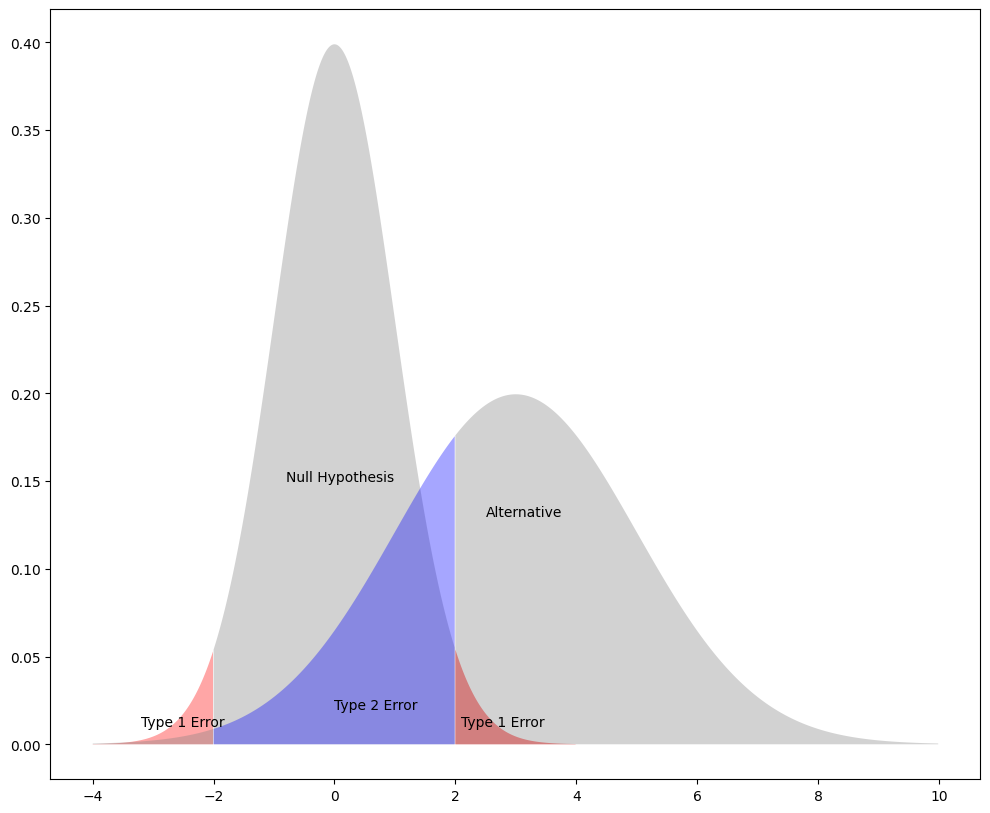

In [111]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01),
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01),
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01),
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01),
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

En el gráfico anterior, las áreas rojas indican errores de tipo I, suponiendo que la hipótesis alternativa no es diferente de la nula para una prueba bilateral con un nivel de confianza del 95 %.

El área azul representa los errores de tipo II que ocurren cuando la hipótesis alternativa es diferente de la nula, como se muestra en la distribución de la derecha. Hay que tener en cuenta que la tasa de error Tipo II es el área bajo la distribución alternativa dentro de los cuantiles determinados por la distribución nula y el nivel de confianza. Podemos calcular la tasa de error tipo II para las distribuciones anteriores de la siguiente manera:

In [110]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,
                     loc=3,
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile,
                      loc=3,
                      scale=2)

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

Con las distribuciones normales anteriores, no podríamos rechazar la hipótesis nula alrededor del 30 % de las veces porque las distribuciones están lo suficientemente juntas como para tener una superposición significativa.

#Análisis de la Potencia

La potencia de una prueba estadística es la probabilidad de que la prueba rechace la hipótesis nula cuando la alternativa es en realidad diferente de la nula. En otras palabras, la potencia es la probabilidad de que la prueba detecte que está sucediendo algo interesante cuando en realidad está sucediendo algo interesante. La potencia es igual a uno menos la tasa de error tipo II. El poder de una prueba estadística está influenciado por:

El nivel de significación elegido para la prueba.
El tamaño de la muestra.
El tamaño del efecto de la prueba.

Al elegir un nivel de significación para una prueba, existe una compensación entre el error de tipo I y el de tipo II. Un nivel de significancia bajo, como 0.01, hace que una prueba sea poco probable que tenga errores de tipo I (falsos positivos), pero es más probable que tenga errores de tipo II (falsos negativos) que una prueba con un valor mayor del nivel de significancia α. Una convención común es que una prueba estadística debe tener una potencia de al menos 0,8.

Un tamaño de muestra más grande reduce la incertidumbre de la estimación puntual, lo que hace que la distribución de la muestra se reduzca, lo que da como resultado tasas de error de tipo II más bajas y una mayor potencia.

El tamaño del efecto es un término general que describe una medida numérica del tamaño de algún fenómeno. Hay muchas medidas diferentes del tamaño del efecto que surgen en diferentes contextos.

 En el contexto de la prueba T, un tamaño de efecto simple es la diferencia entre las medias de las muestras. Este número se puede estandarizar dividiendo por la desviación estándar de la población o la desviación estándar combinada de las muestras. Esto pone el tamaño del efecto en términos de desviaciones estándar, por lo que un tamaño de efecto estandarizado de 0,5 se interpretaría como una media de muestra con 0,5 desviaciones estándar de otra (en general, 0,5 se considera un tamaño de efecto "grande").

Dado que el poder estadístico, el nivel de significación, el tamaño del efecto y el tamaño de la muestra están relacionados, es posible calcular cualquiera de ellos para valores dados de los otros tres. Esto puede ser una parte importante del proceso de diseño de una prueba de hipótesis y análisis de resultados. Por ejemplo, si desea realizar una prueba con un nivel de significación determinado (digamos el estándar 0,05) y potencia (digamos el estándar 0,8) y está interesado en un tamaño de efecto dado (digamos 0,5 para la diferencia estandarizada entre las medias de la muestra), se podría usar esa información para determinar qué tamaño de muestra necesita.

En Python, la biblioteca statsmodels contiene funciones para resolver cualquier parámetro del poder de las pruebas T. Utilice statsmodels.stats.power.tt_solve_power para una prueba t de muestra y statsmodels.stats.power.tt_ind_solve_power para una prueba t de dos muestras. Verifiquemos el tamaño de la muestra que debemos usar dados los valores de los parámetros estándar anteriores para una prueba t de una muestra:

In [ ]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size = 0.5, #a menos más, una media muestral con 0,5 desviaciones estándar de otra, cuanto menos se lleven las medias + tamaño muestral necesitaré
               alpha = 0.05, #a menos más
               power = 0.8) #a más, más

33.3671314275208

En este caso, querríamos un tamaño de muestra de al menos 34 para hacer un estudio con el poder deseado y el nivel de significación capaz de detectar un tamaño de efecto grande.

#Resumen
La prueba t es una herramienta poderosa para investigar las diferencias entre las medias de la muestra y la población. Las pruebas T operan sobre variables numéricas; en la próxima lección, discutiremos las pruebas estadísticas para variables categóricas.

In [11]:
obesity_all = pd.read_csv("./ObesityDataSet.csv")

obesity_all

obesity_all.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


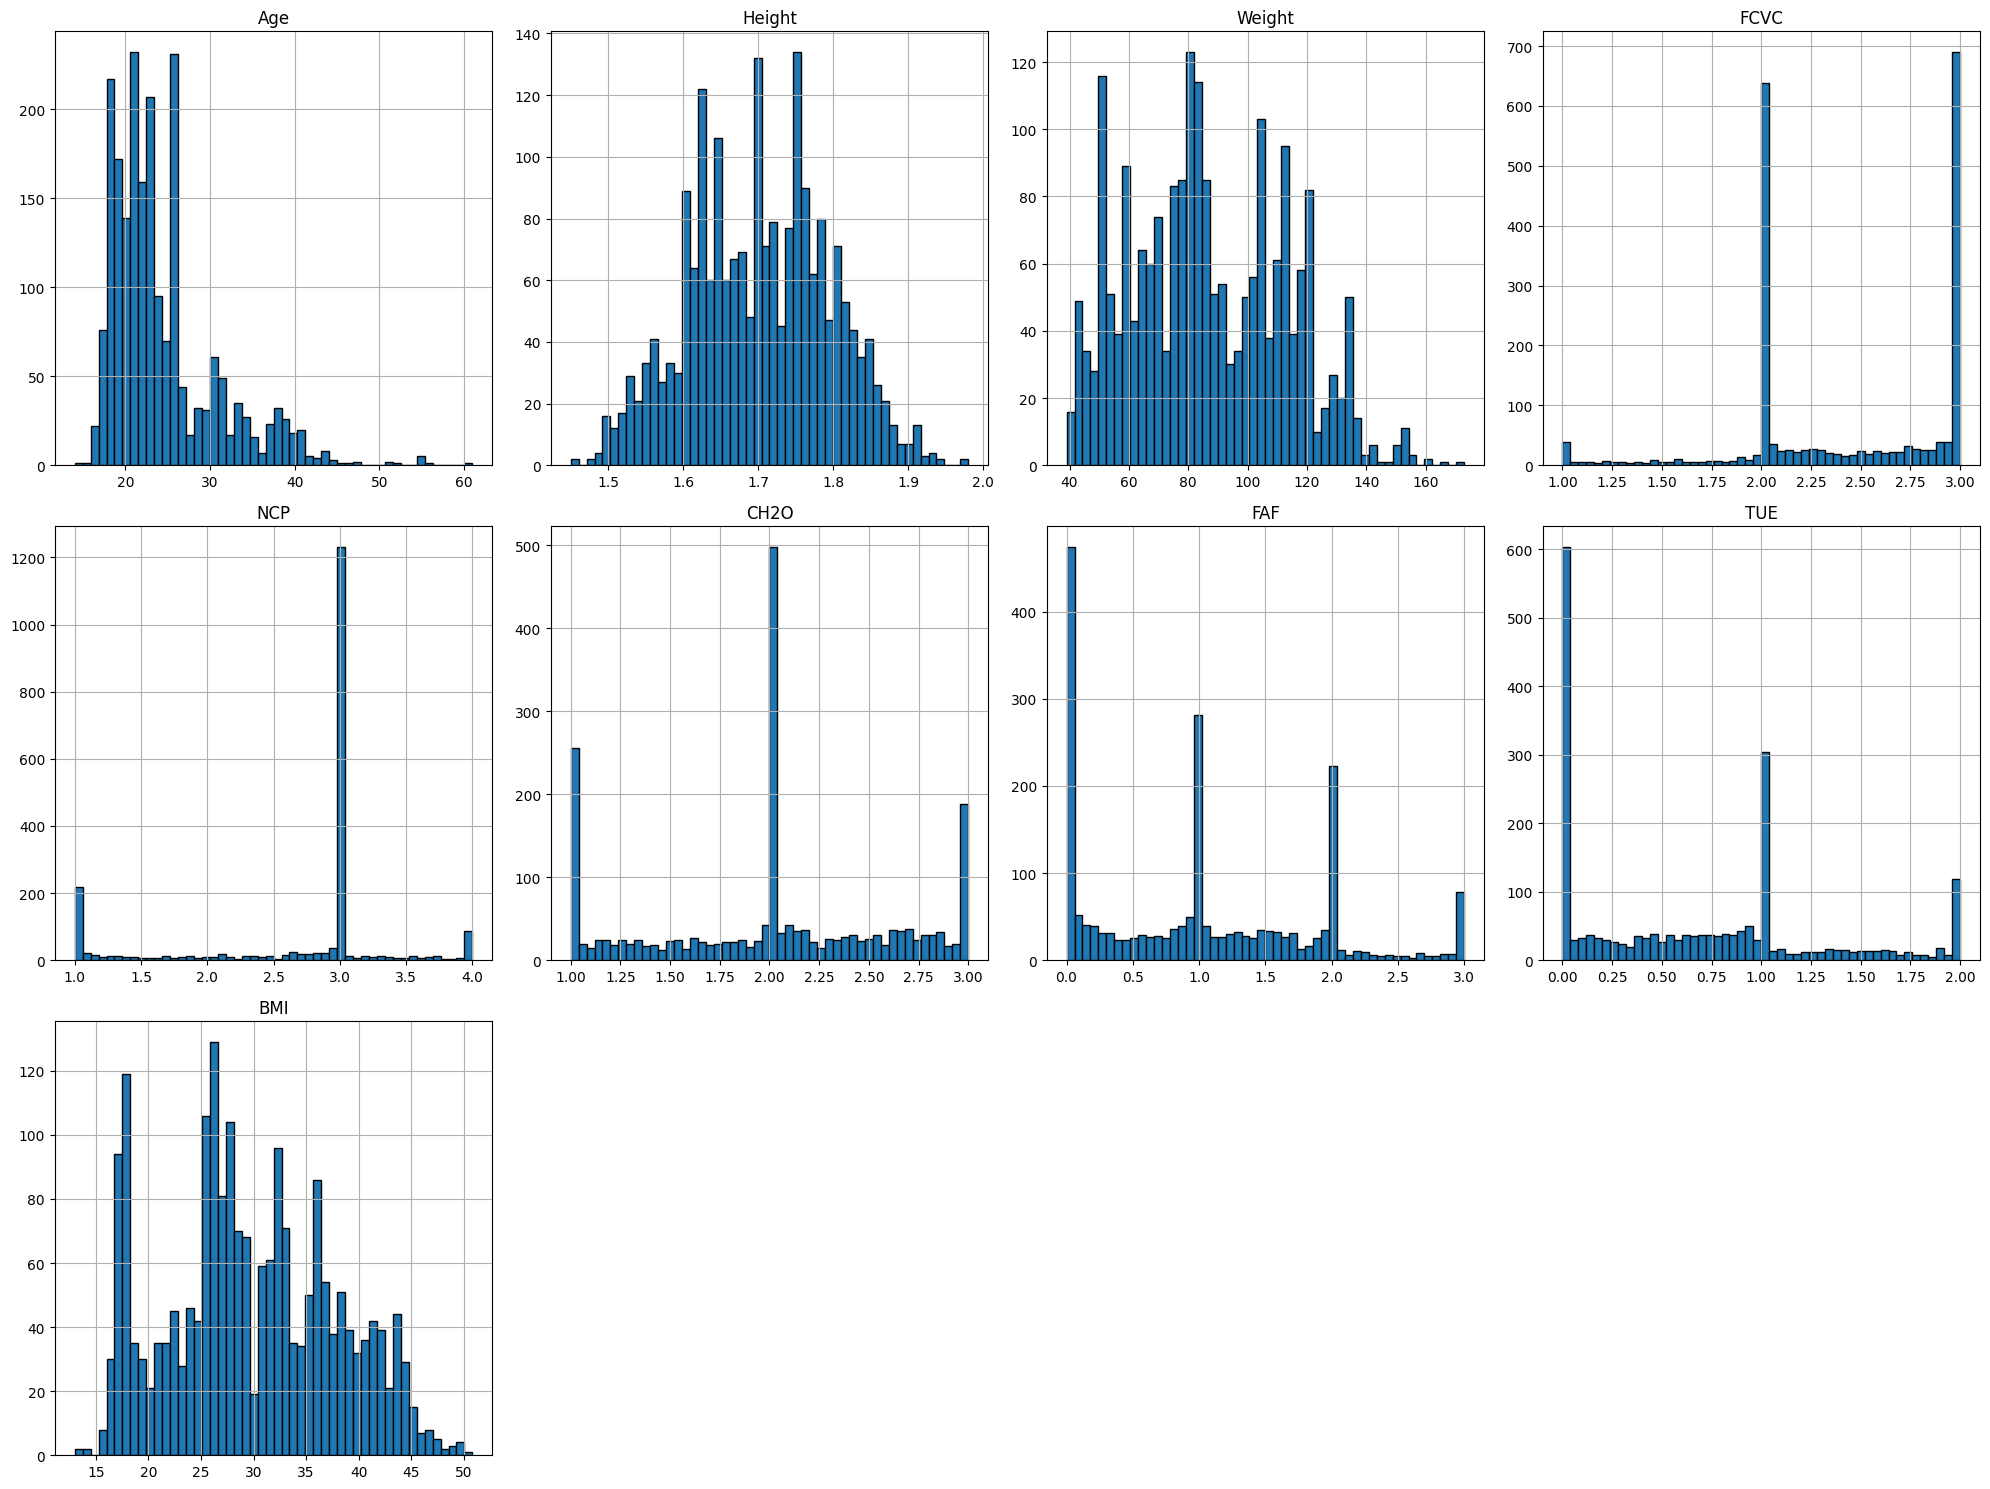

In [112]:
obesity_all.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

In [21]:
obesity_all['BMI'] = obesity_all['Weight'] / ((obesity_all['Height']) ** 2)
obesity_all.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700284
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011220
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.300000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.700000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.800000


In [24]:
obesity_male = obesity_all[obesity_all['Gender'] == 'Male']
obesity_female = obesity_all[obesity_all['Gender'] == 'Female']
obesity_male.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.9
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.3
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,20.2
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,19.7


In [25]:
obesity_female.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.2
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,24.4
11,Female,21.0,1.72,80.0,yes,yes,2.0,3.0,Frequently,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II,27.0
15,Female,22.0,1.70,66.0,yes,no,3.0,3.0,Always,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight,22.8


In [26]:
obesity_male.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,24.616020,1.758690,90.769478,2.274238,2.737592,2.073373,1.169639,0.668256,29.281835
std,6.273121,0.072174,21.407030,0.477400,0.735382,0.584581,0.830368,0.643032,6.347297
min,14.000000,1.560000,45.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.300000
25%,20.000000,1.705205,75.000000,2.000000,2.658747,1.880571,0.582555,0.000000,25.600000
50%,23.000000,1.760000,89.945470,2.032064,3.000000,2.000000,1.000000,0.601865,28.900000
75%,27.933529,1.807382,108.460518,2.737235,3.000000,2.464554,1.927013,1.000000,35.225000
max,56.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,49.500000


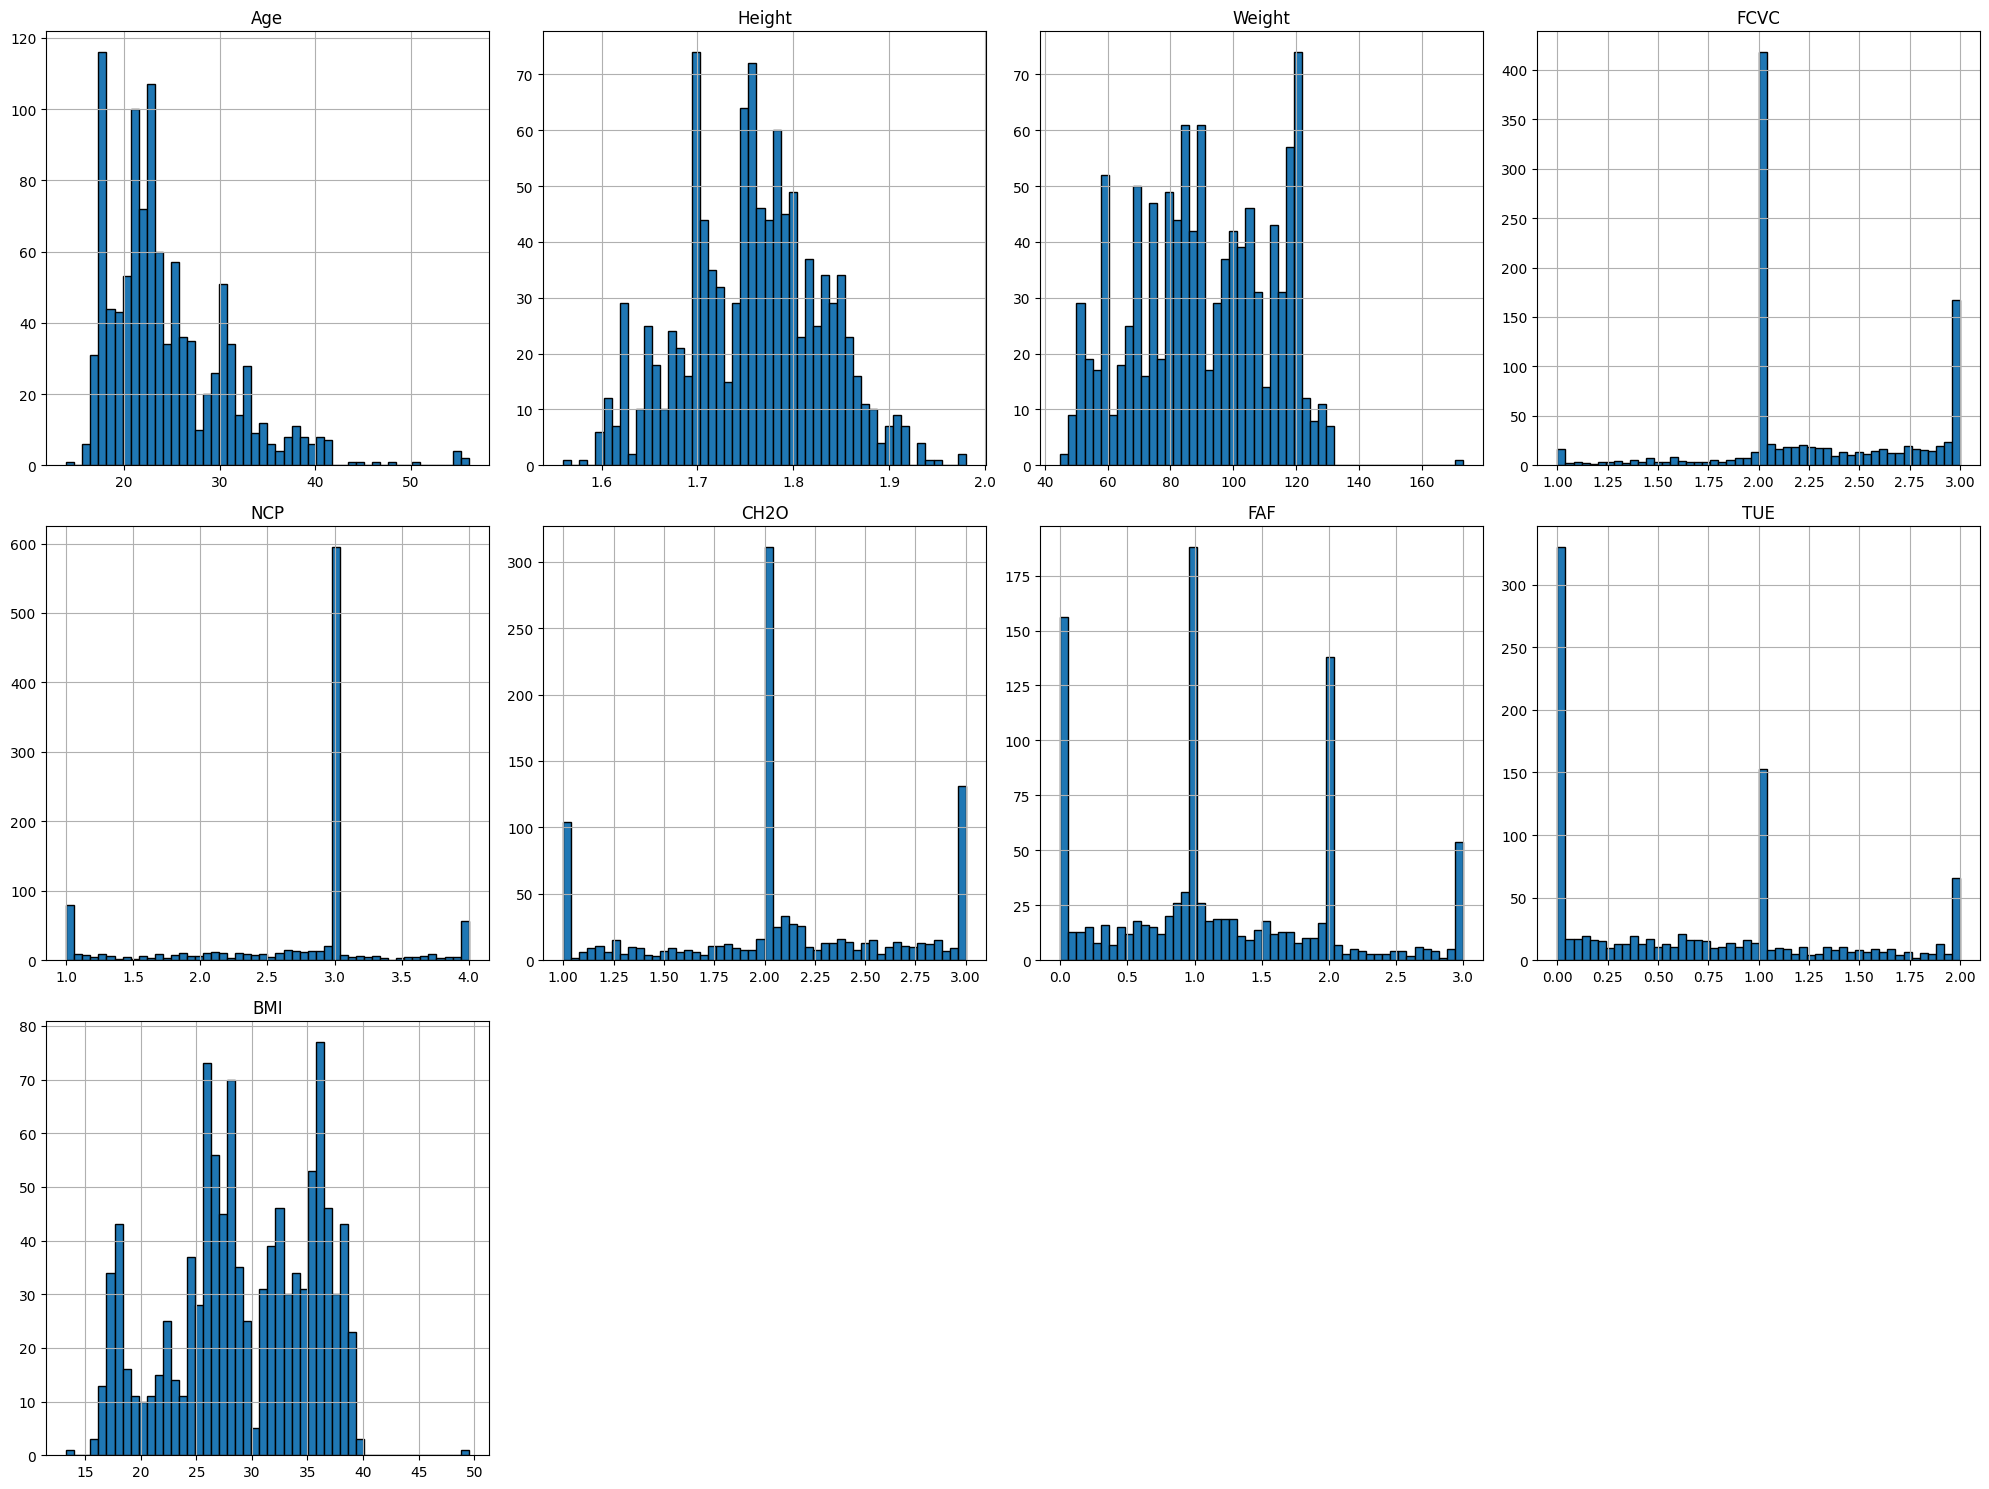

In [114]:
obesity_male.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

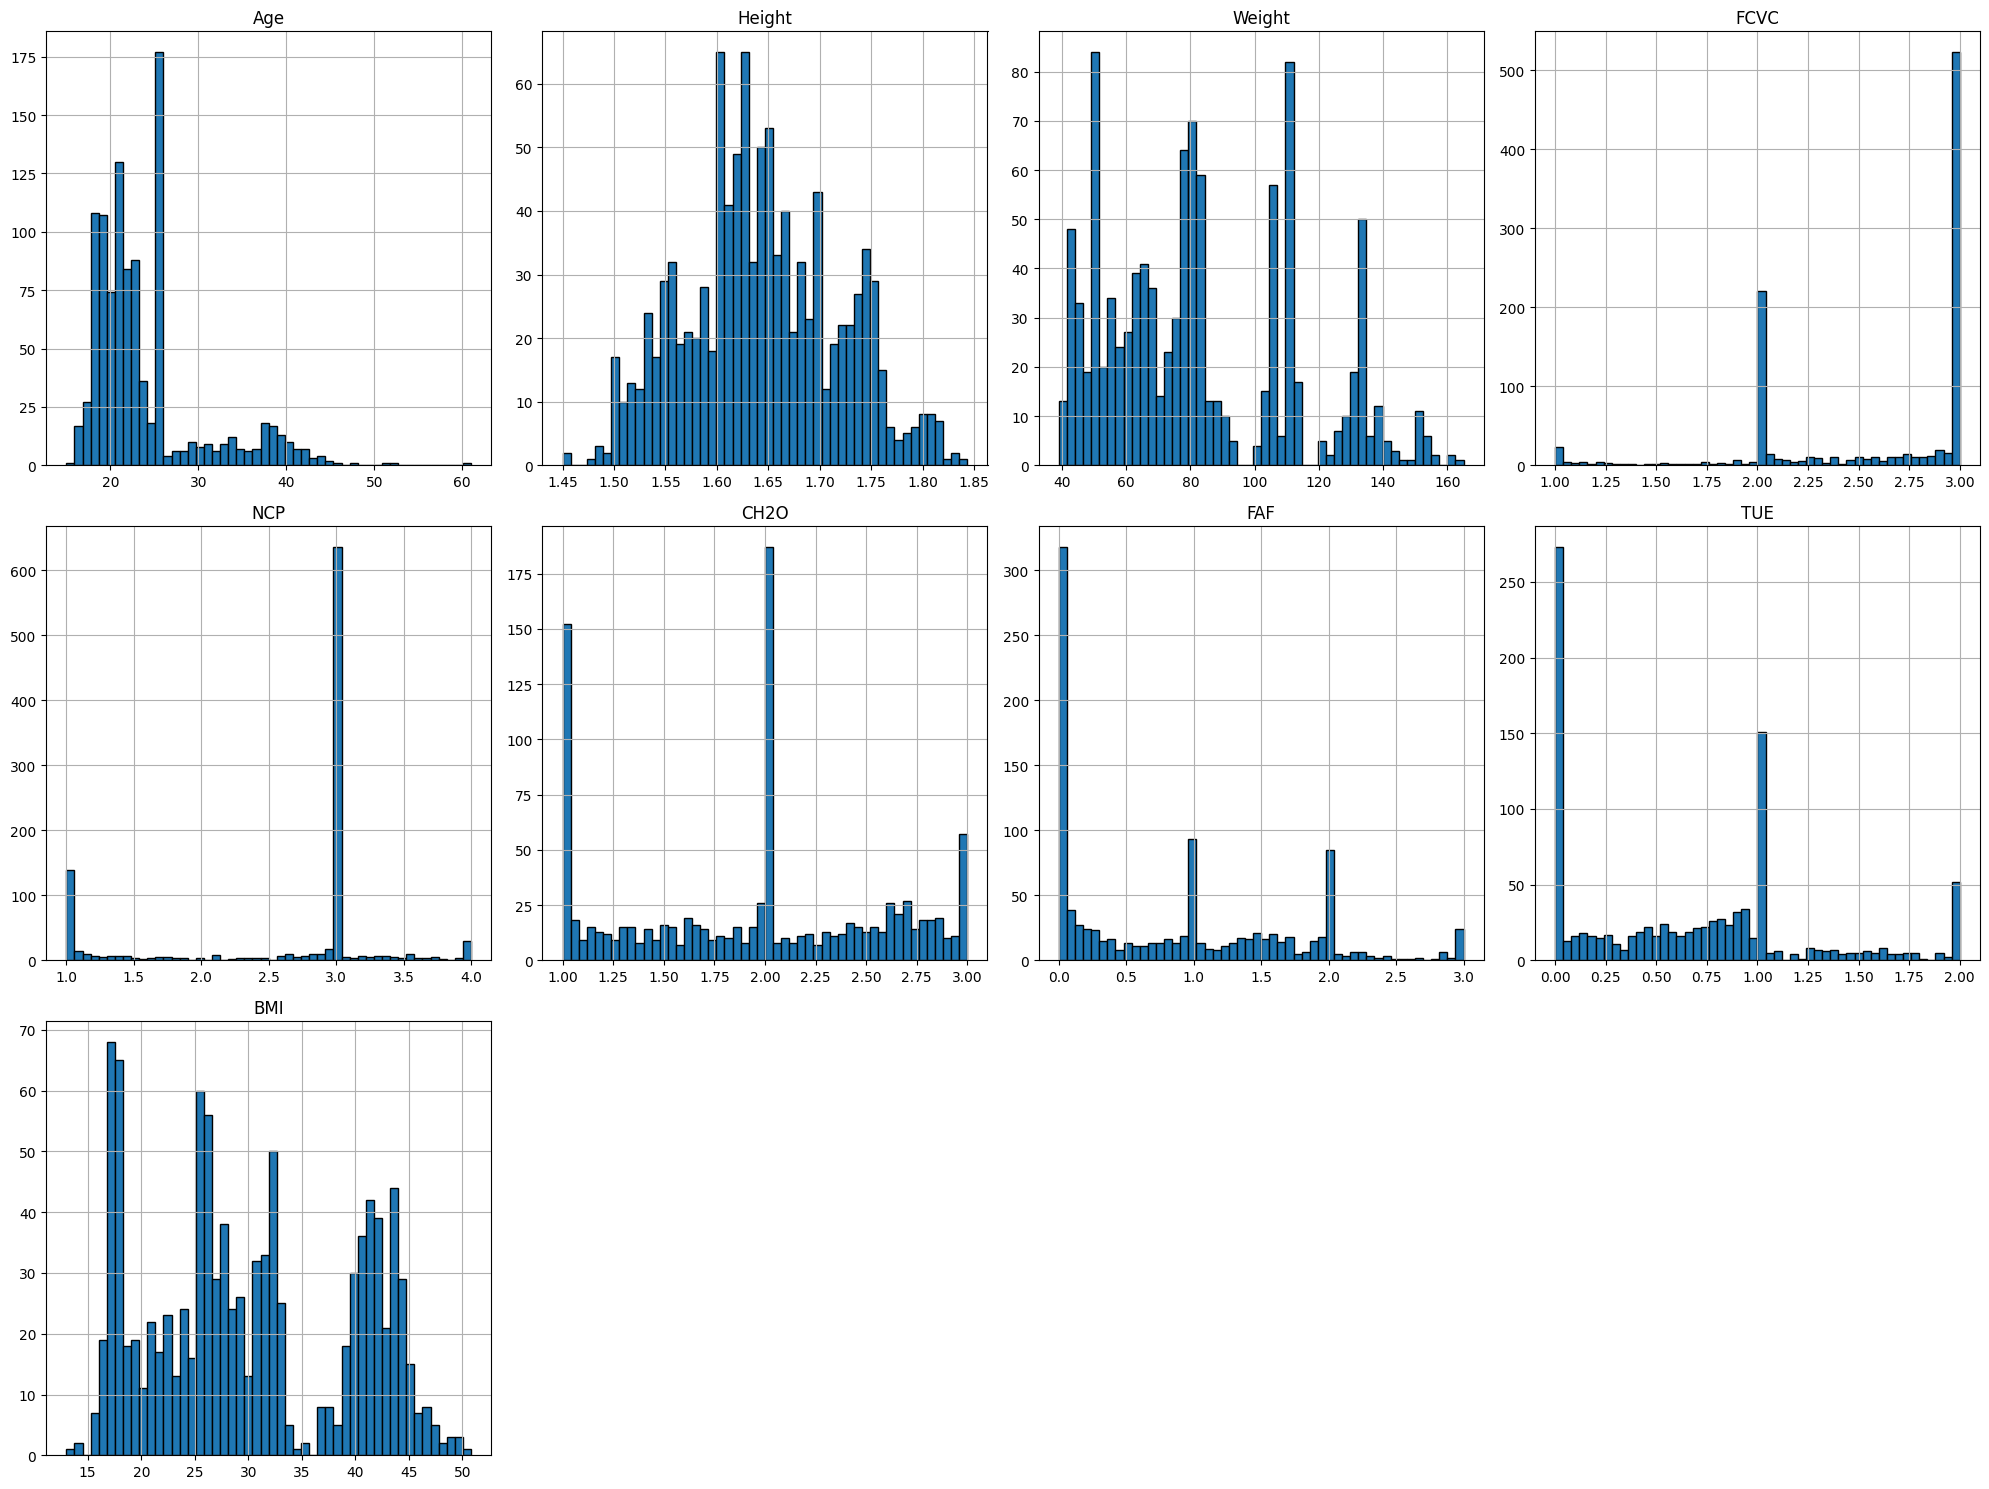

In [115]:
obesity_female.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

In [30]:
obesity_male_u18 = obesity_male[obesity_male['Age'] < 18]
obesity_male_over18 = obesity_male[obesity_male['Age'] >= 18]
obesity_female_u18 = obesity_female[obesity_female['Age'] < 18]
obesity_female_over18 = obesity_female[obesity_female['Age'] >= 18]


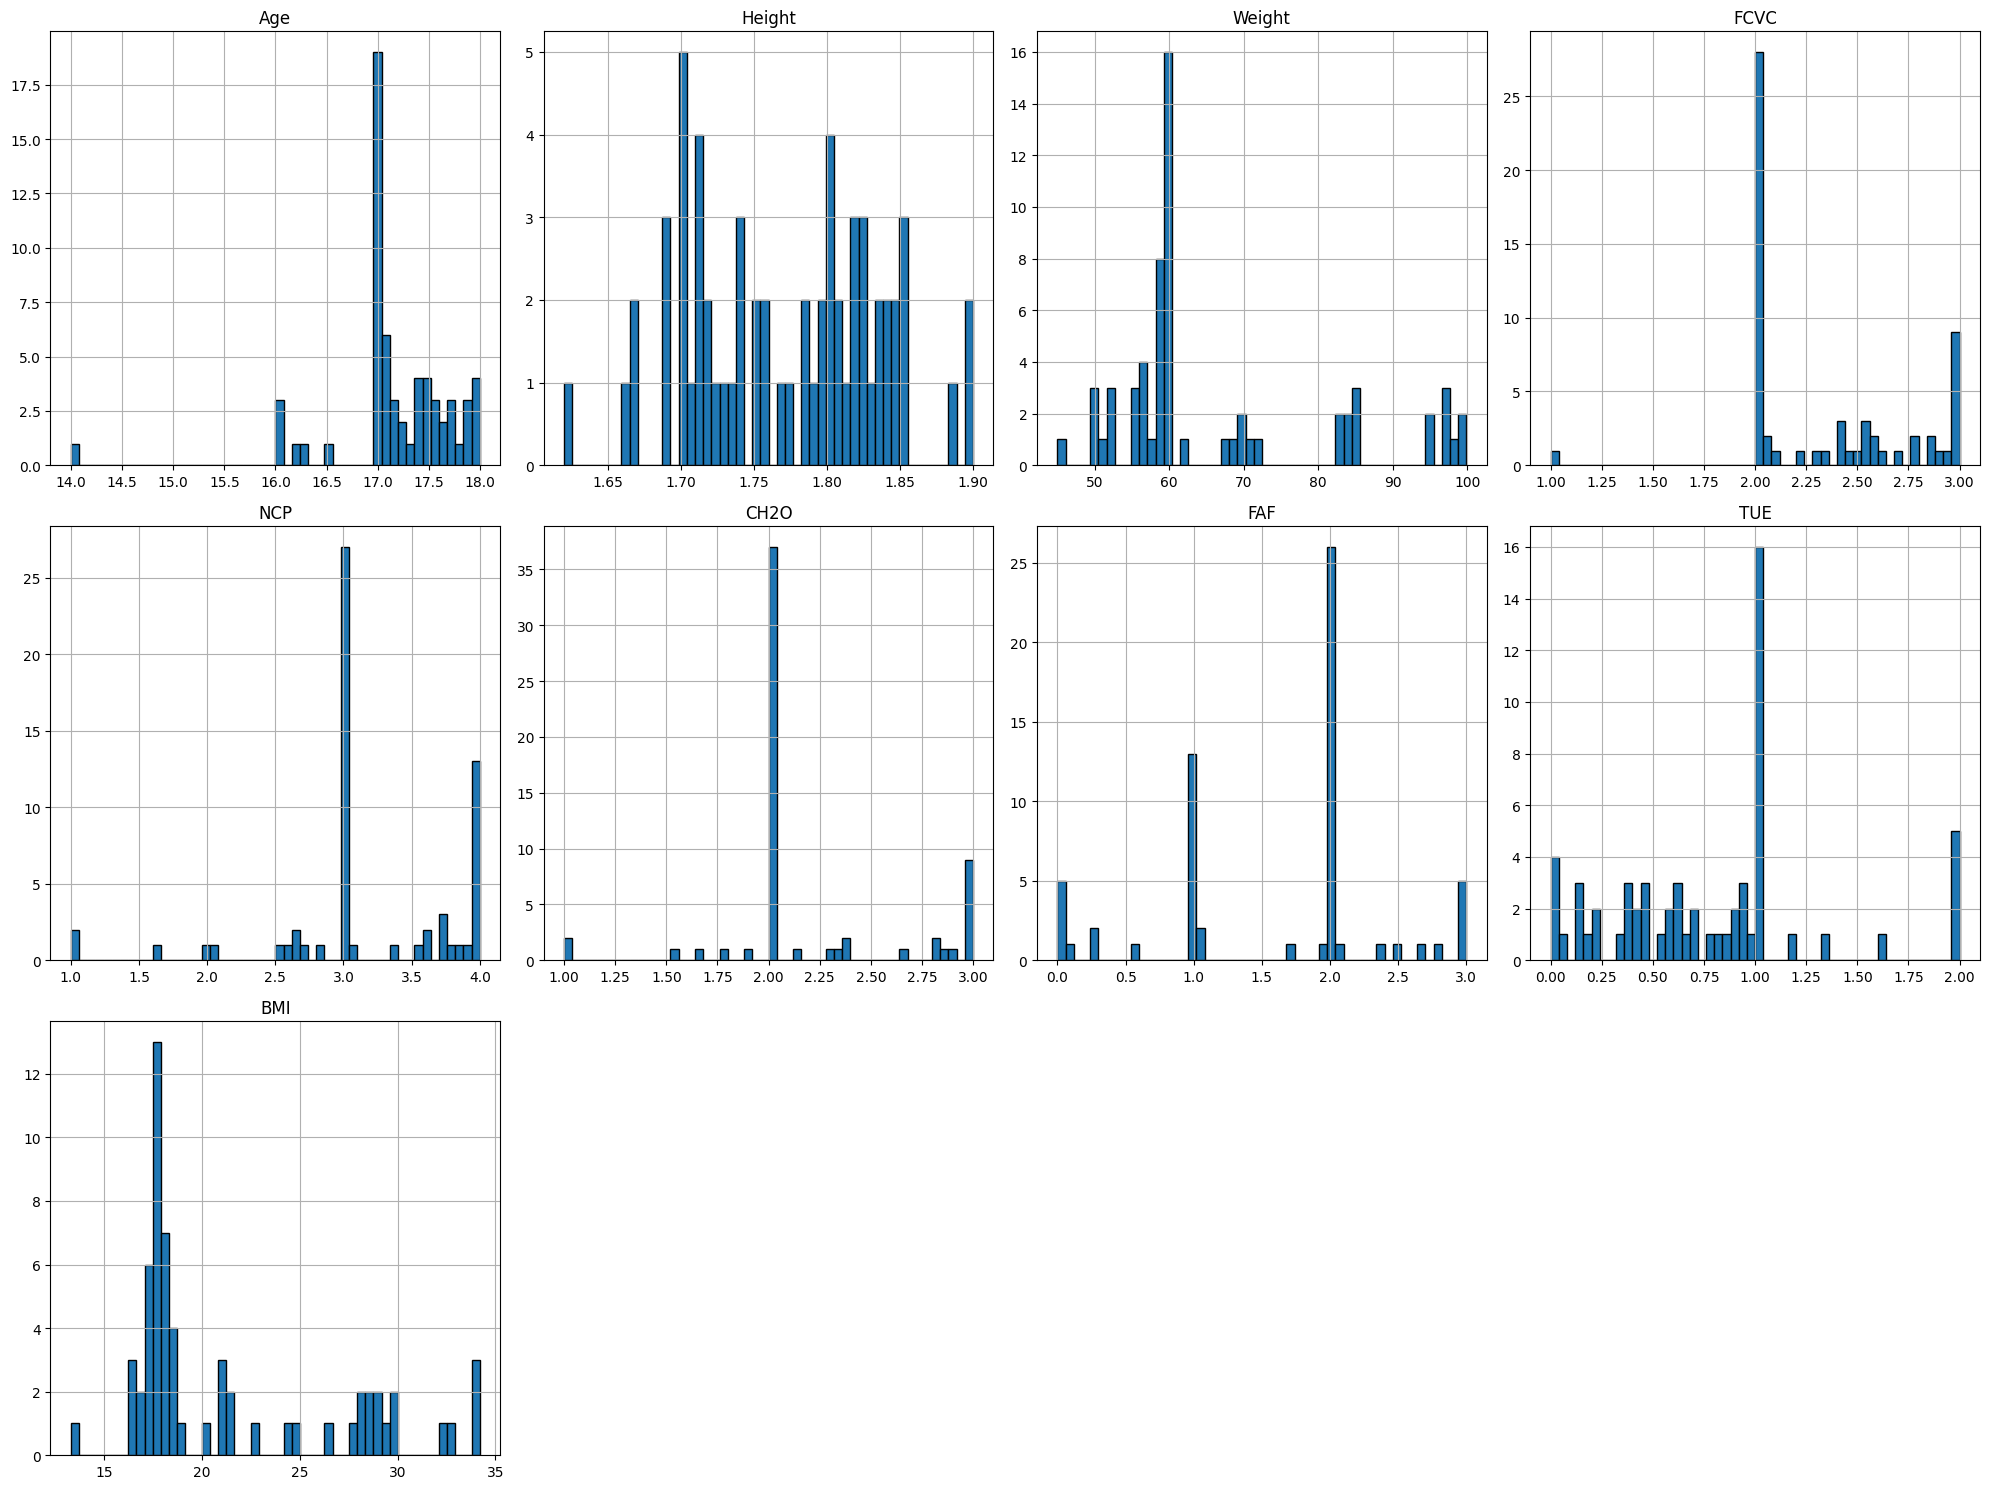

In [116]:
obesity_male_u18.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

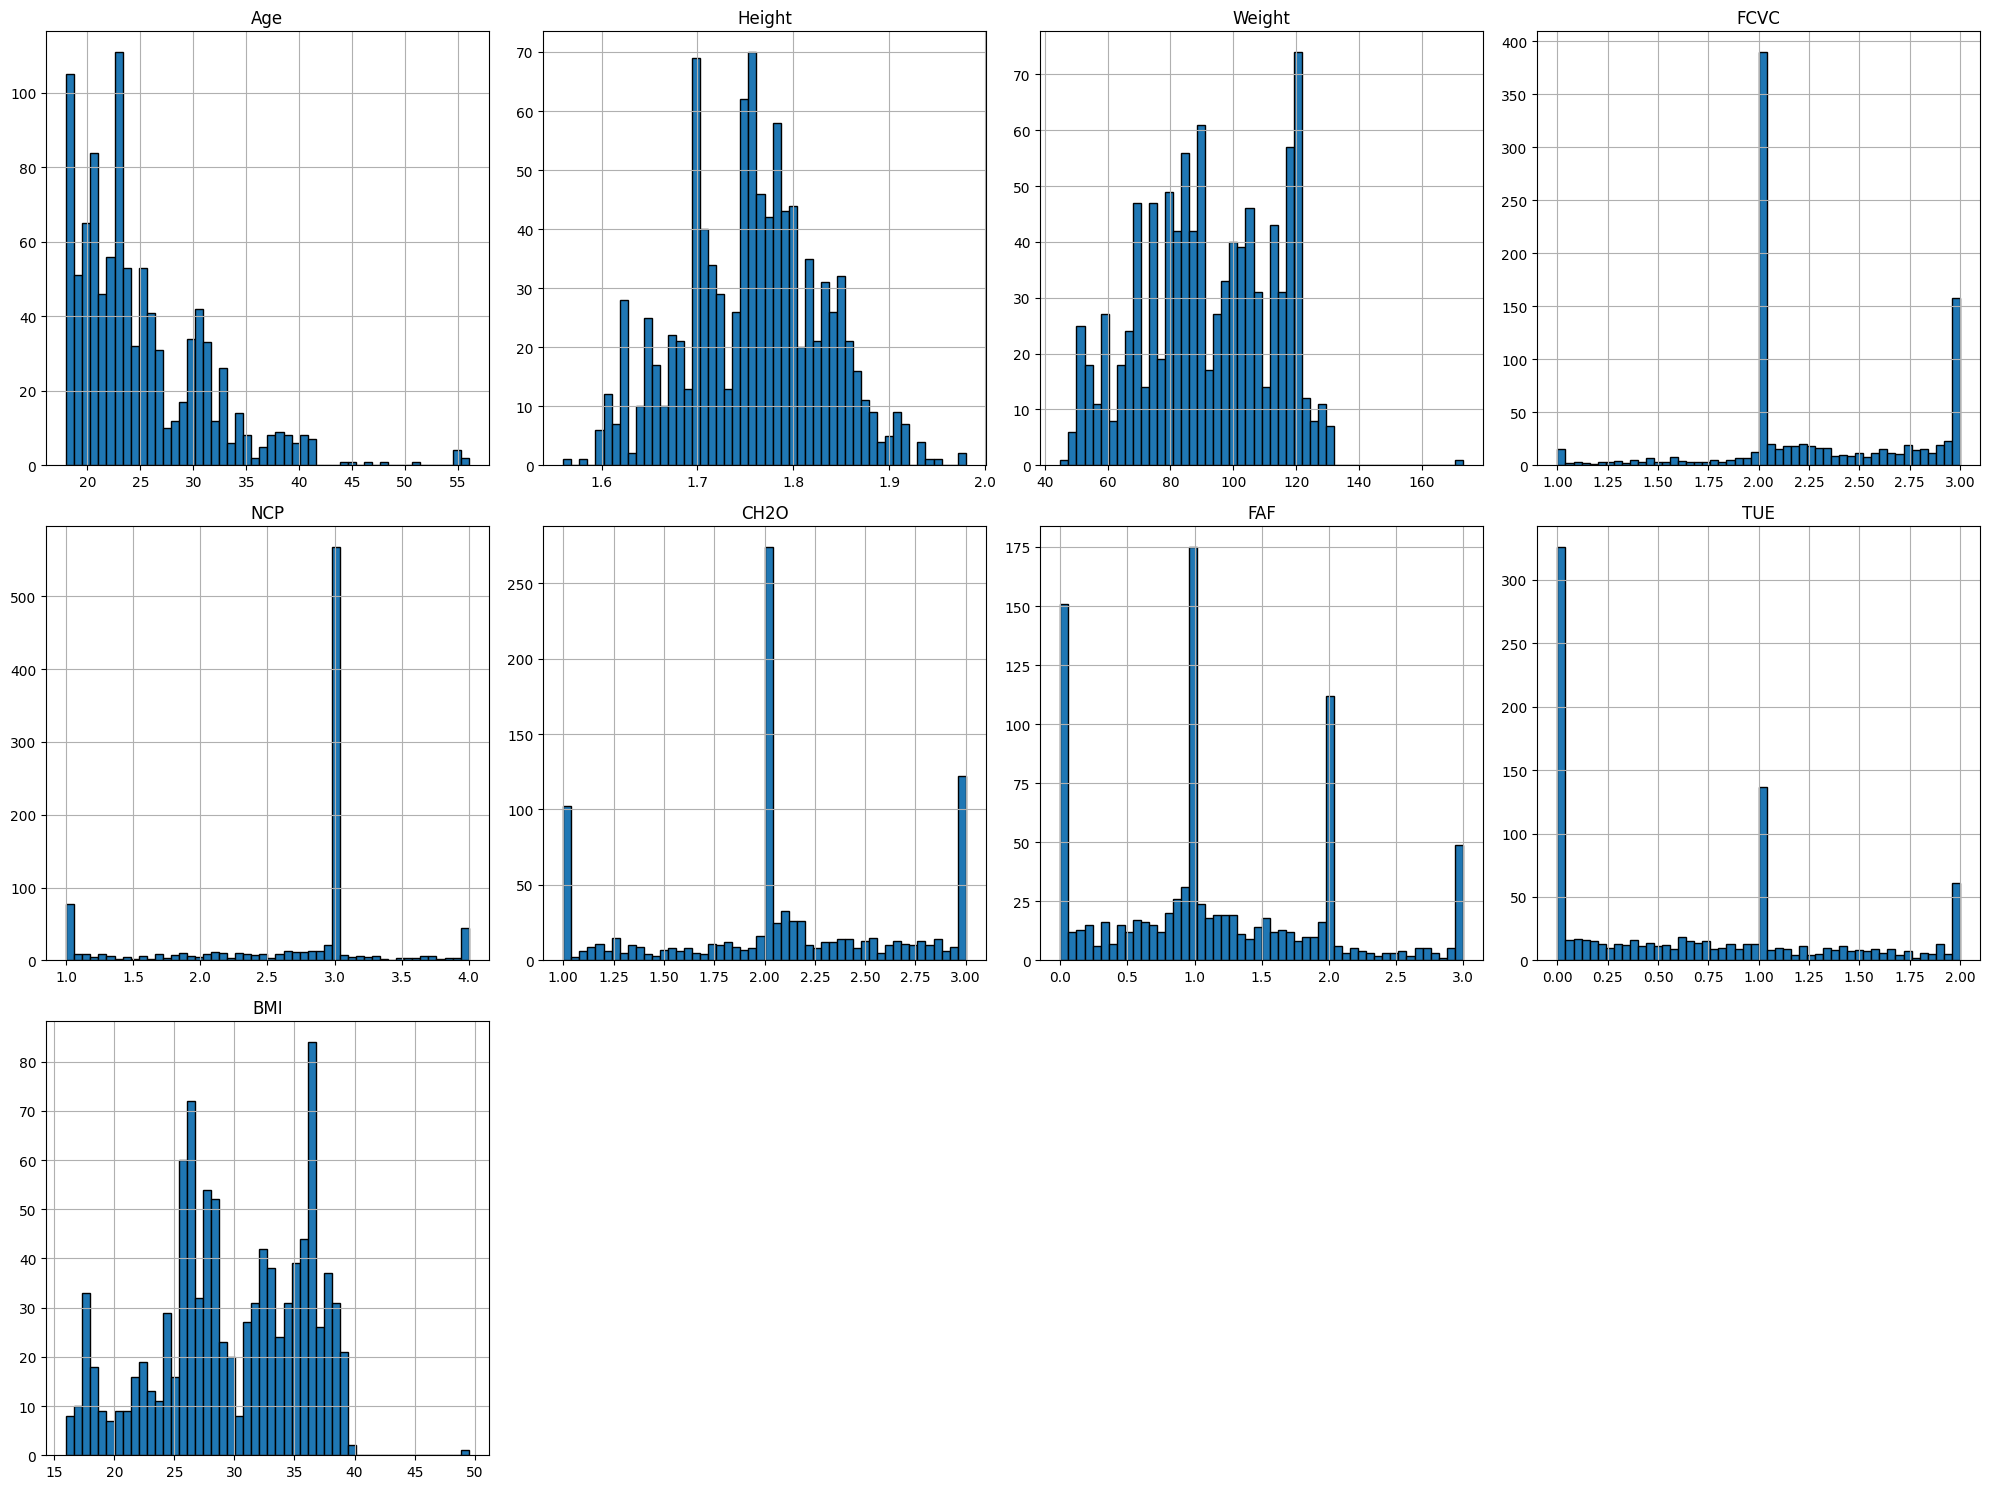

In [117]:
obesity_male_over18.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

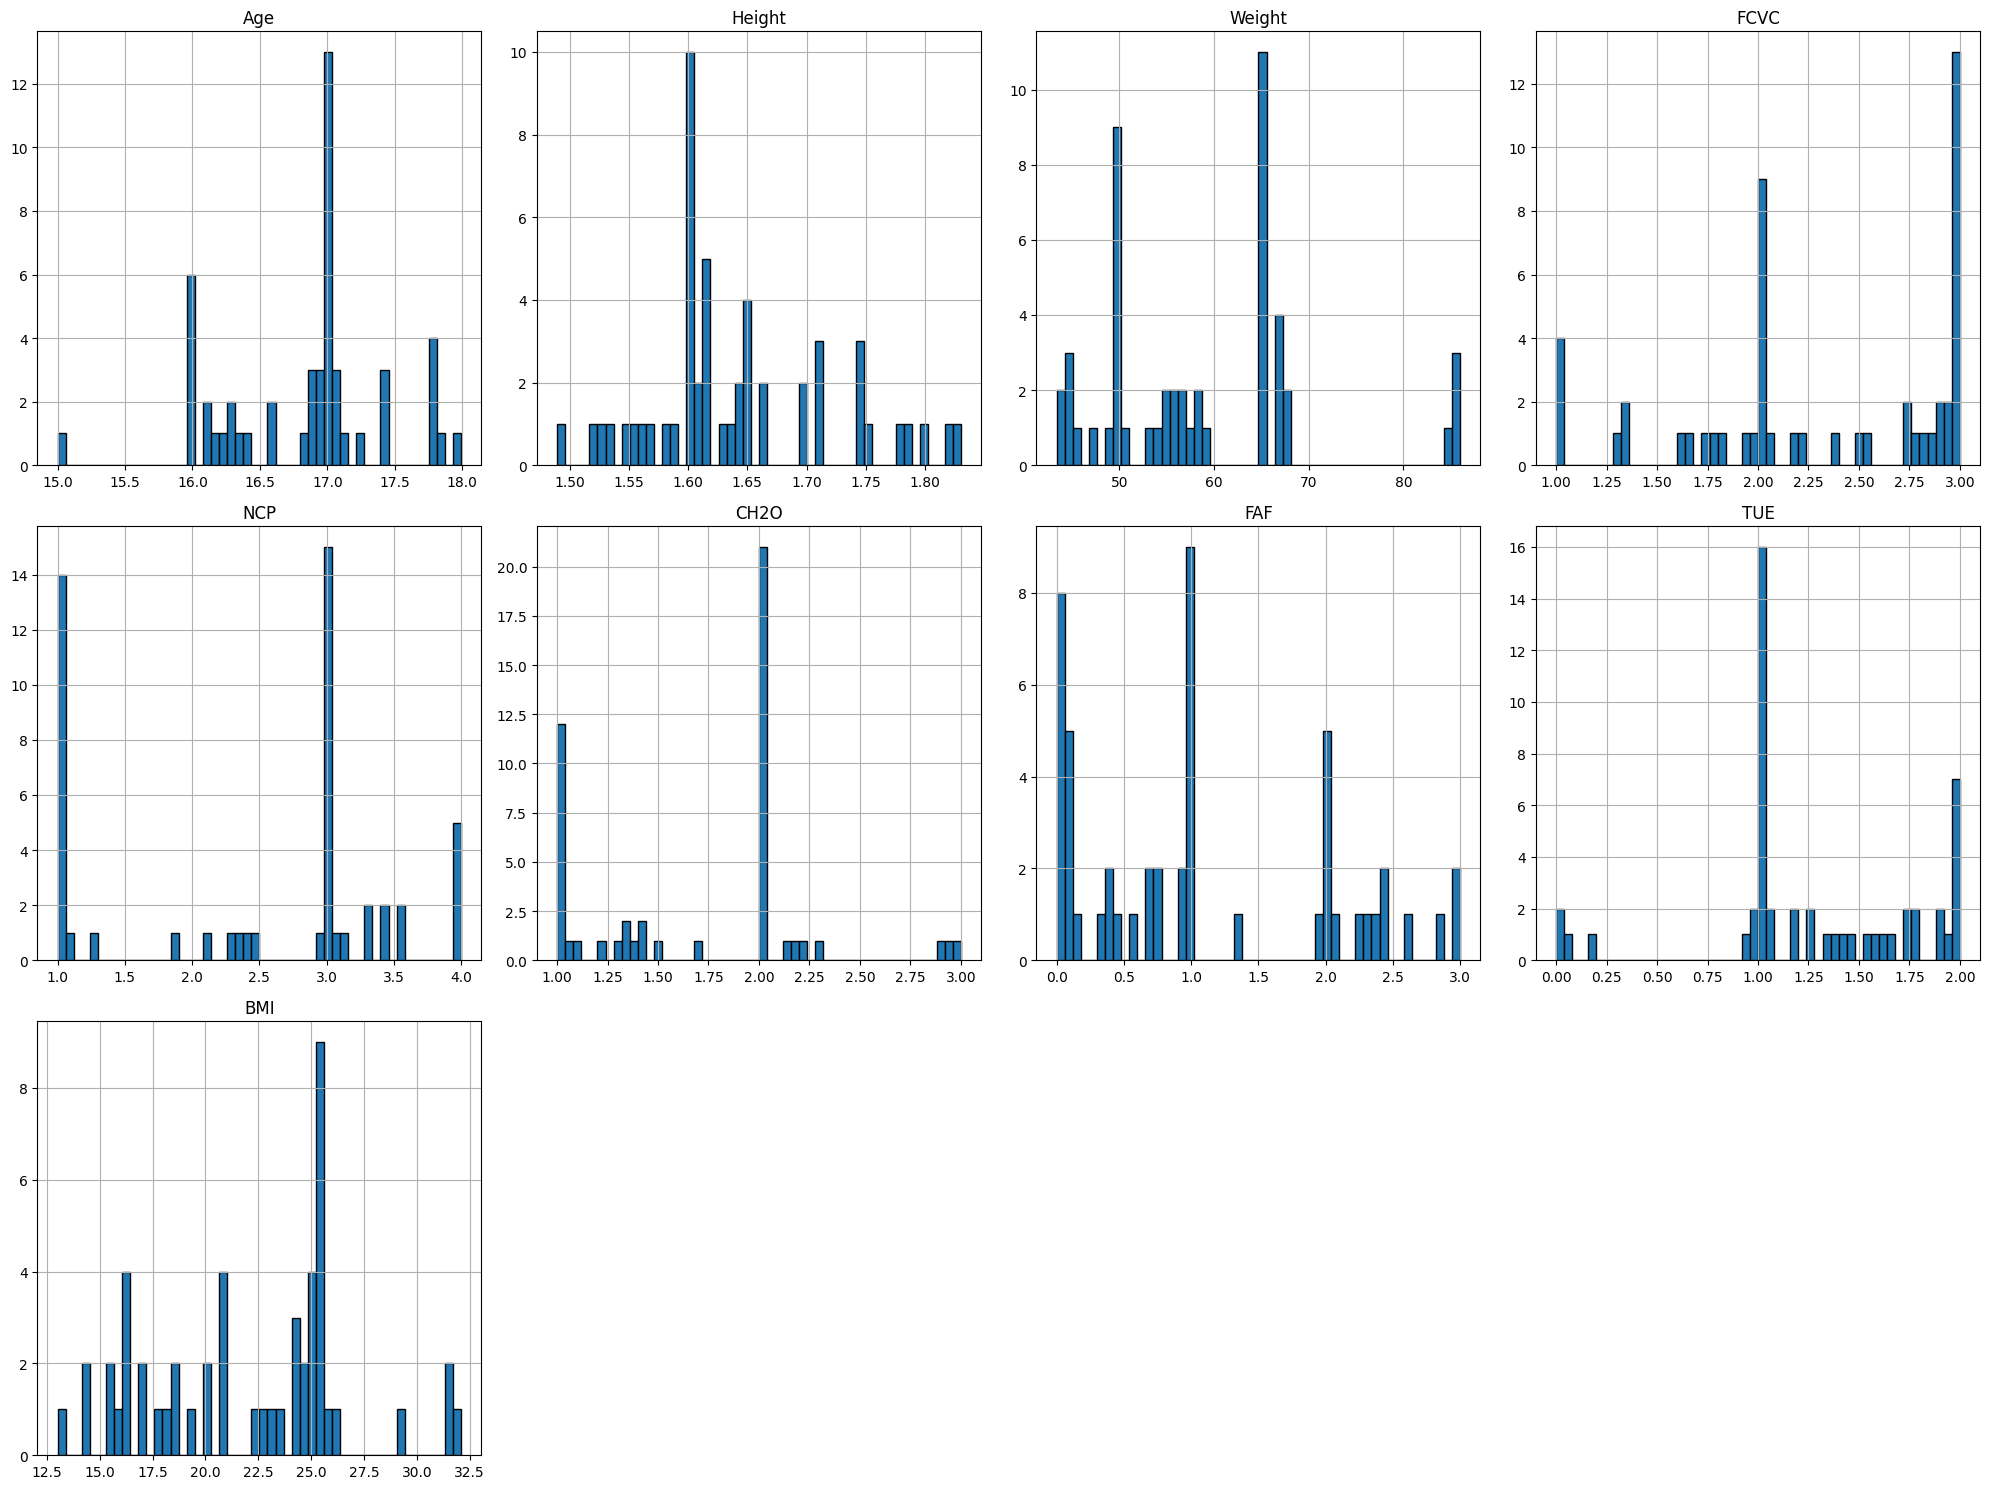

In [118]:
obesity_female_u18.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

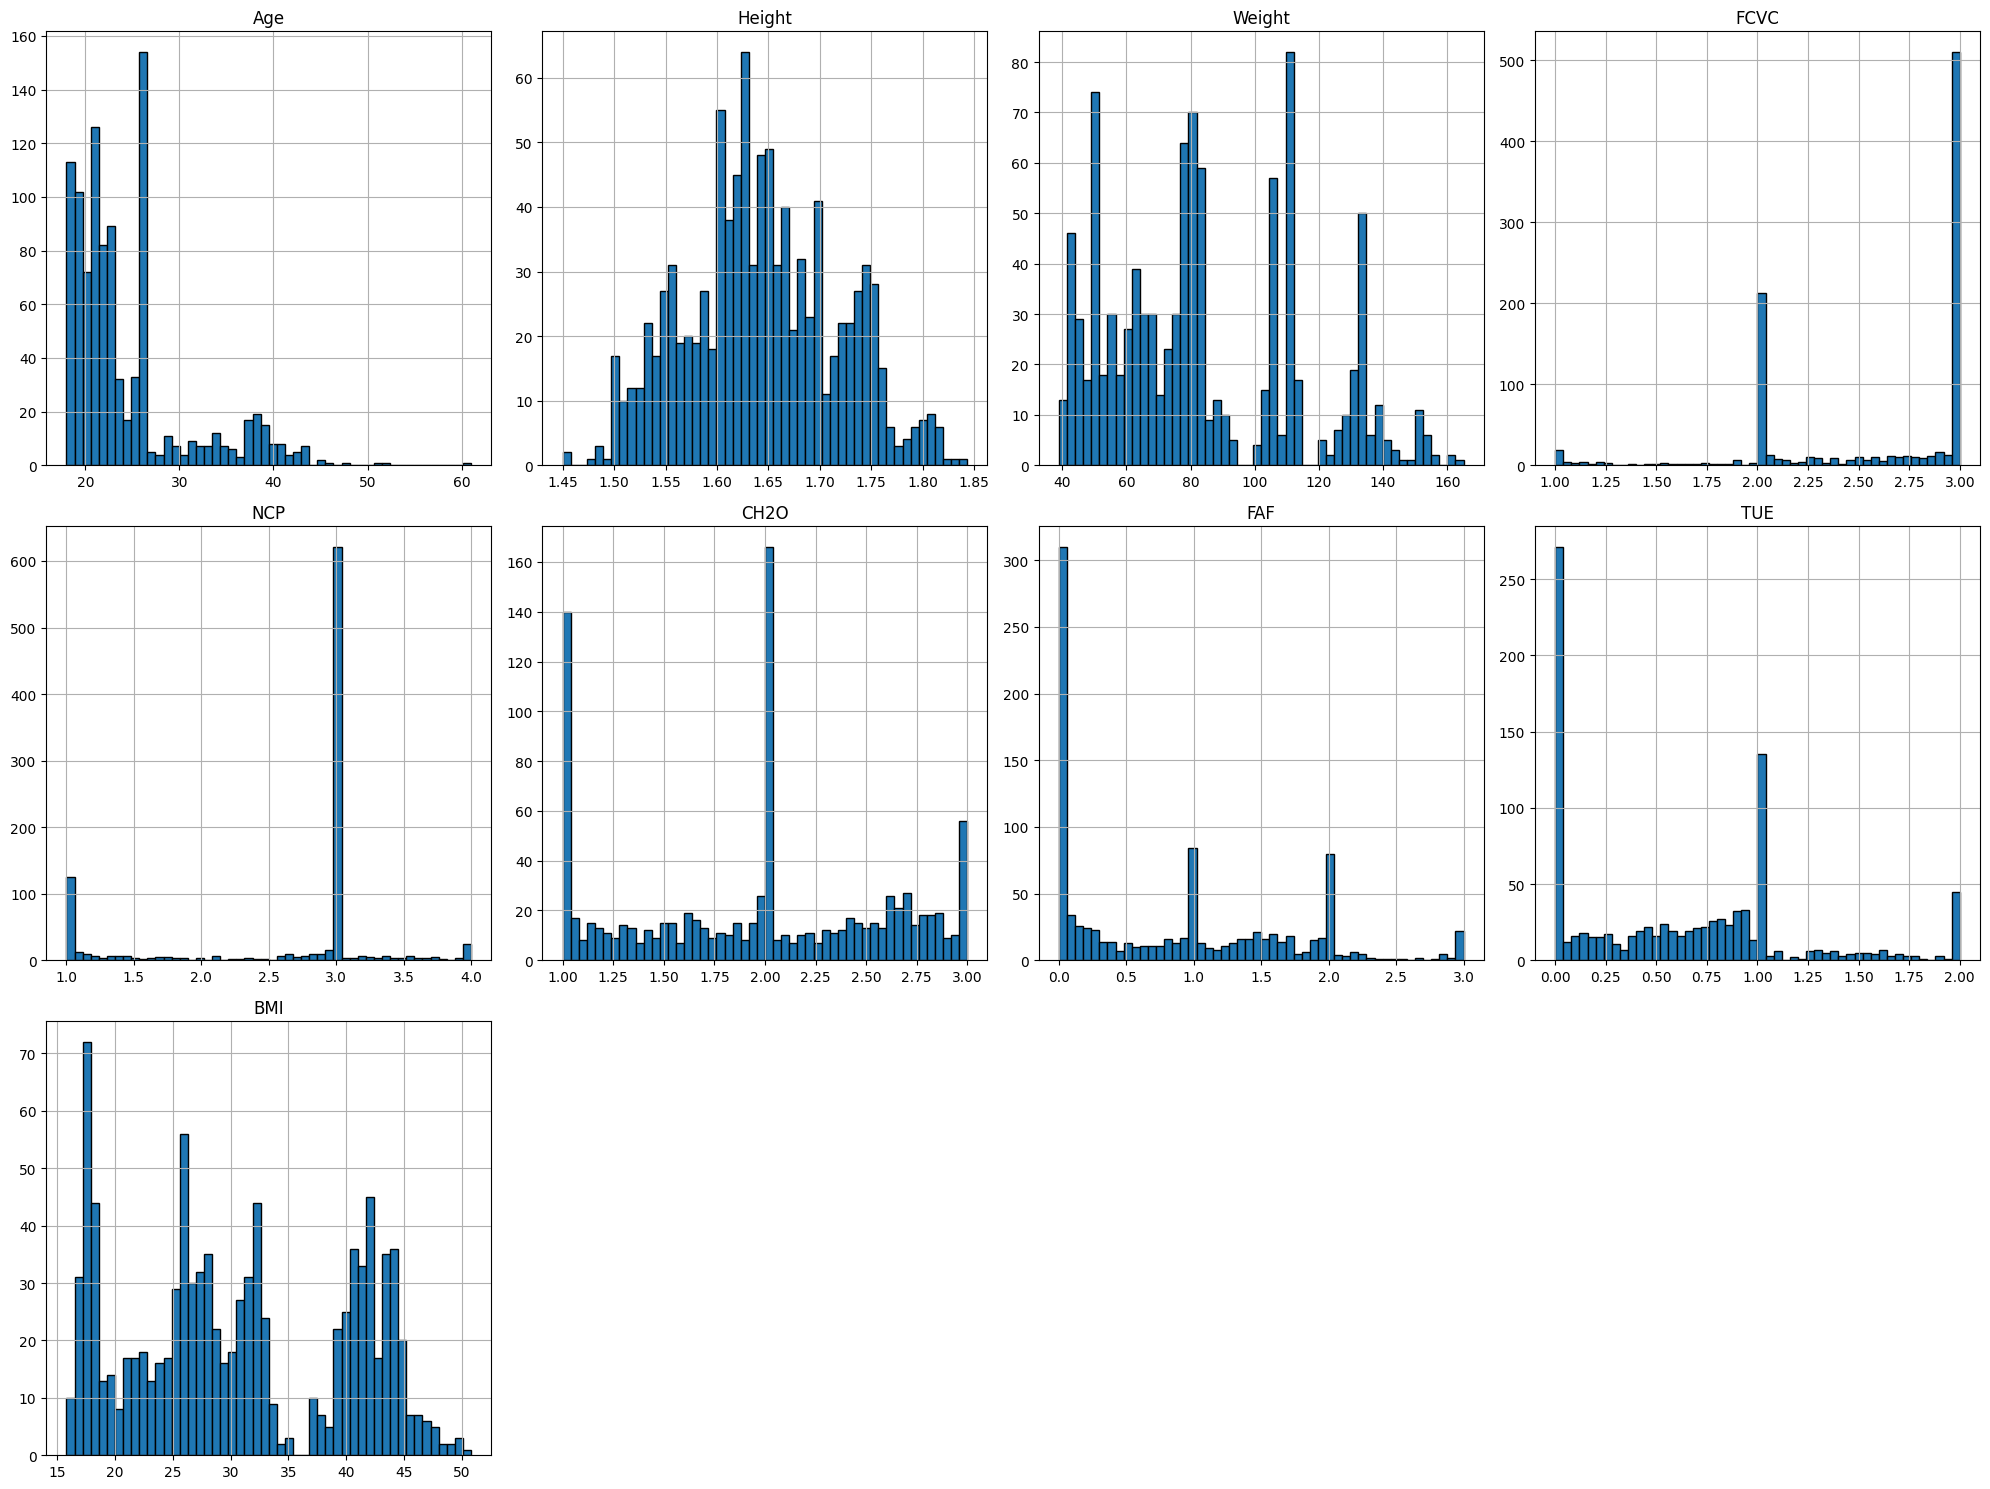

In [119]:
obesity_female_over18.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

In [36]:
obesity_female_u18.head()
obesity_female_u18.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,16.830132,1.642645,58.794747,2.295184,2.443651,1.697614,1.080712,1.272142,22.005882
std,0.604516,0.079597,11.036202,0.657338,1.065123,0.552033,0.948027,0.526594,4.733346
min,15.000000,1.489409,43.365005,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000
25%,16.338439,1.600000,50.000000,1.962766,1.000000,1.087235,0.144931,1.000000,18.000000
50%,17.000000,1.617124,57.000000,2.206399,3.000000,2.000000,0.977929,1.165817,23.000000
75%,17.074156,1.700000,65.000000,2.957538,3.049200,2.000000,2.000000,1.737194,25.350000
max,17.992717,1.830068,86.000000,3.000000,4.000000,3.000000,3.000000,2.000000,32.100000


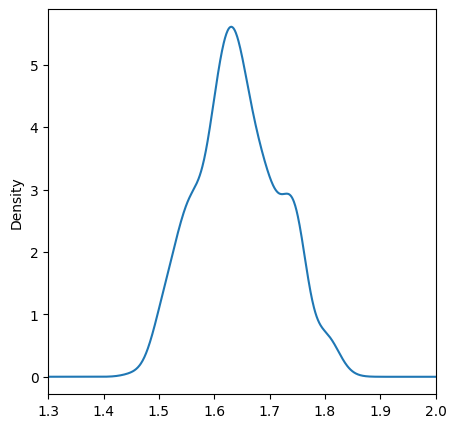

In [96]:
obesity_female_over18["Height"].plot(kind="density",  # Create density plot
                      figsize=(5,5),    # Set figure size
                      xlim= (1.3, 2));

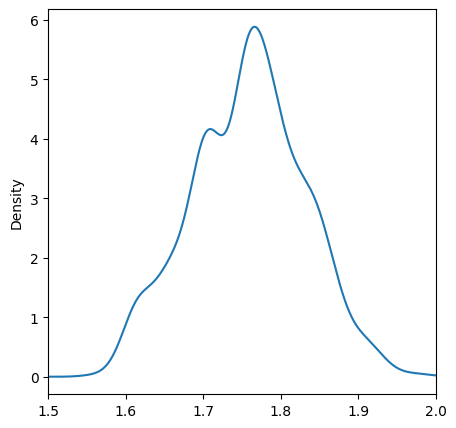

In [98]:
obesity_male_over18["Height"].plot(kind="density",  # Create density plot
                      figsize=(5,5),    # Set figure size
                      xlim= (1.5, 2));

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 11.3436] [loc=1.643 scale=0.074]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 111.858] [loc=1.450 scale=0.193]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 111.858] [loc=-16777214.550 scale=16777216.000]
[distfit] >INFO> [dweibull  ] [0.00 sec] [RSS: 14.4719] [loc=1.637 scale=0.064]
[distfit] >INFO> [t         ] [0.03 sec] [RSS: 11.3461] [loc=1.643 scale=0.074]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 10.5545] [loc=1.616 scale=0.072]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 10.852] [loc=0.811 scale=0.007]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 10.8642] [loc=0.421 scale=1.220]
[distfit] >INFO> [beta      ] [0.00 sec] [RSS: 10.5618] [loc=1.433 scale=0.452]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 64.0817] [loc=1.450 scale=0.393]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 11.3525] [loc=-16.125 scale=2.524]
[distfit] >INFO> Compute confidence intervals [parametri

          name       score          loc       scale  \
0   genextreme   10.554479     1.616225    0.072418   
1         beta    10.56183     1.433379    0.452481   
2        gamma   10.851955     0.811482    0.006638   
3      lognorm   10.864158     0.421385    1.219694   
4         norm   11.343595     1.643331    0.074244   
5            t   11.346107     1.643327    0.074219   
6     loggamma   11.352516    -16.12524    2.524024   
7     dweibull   14.471921     1.636818    0.064328   
8      uniform   64.081731         1.45    0.393419   
9        expon  111.858473         1.45    0.193331   
10      pareto  111.858473 -16777214.55  16777216.0   

                                       arg  \
0                    (0.2554793173102181,)   
1   (3.830051447916582, 4.420148861410583)   
2                     (125.3180365104567,)   
3                  (0.060755435906952954,)   
4                                       ()   
5                     (2254.366539384876,)   
6                

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ngenextreme(c=0.255479, loc=1.61622, scale=0.0724177)'}, xlabel='Values', ylabel='Frequency'>)

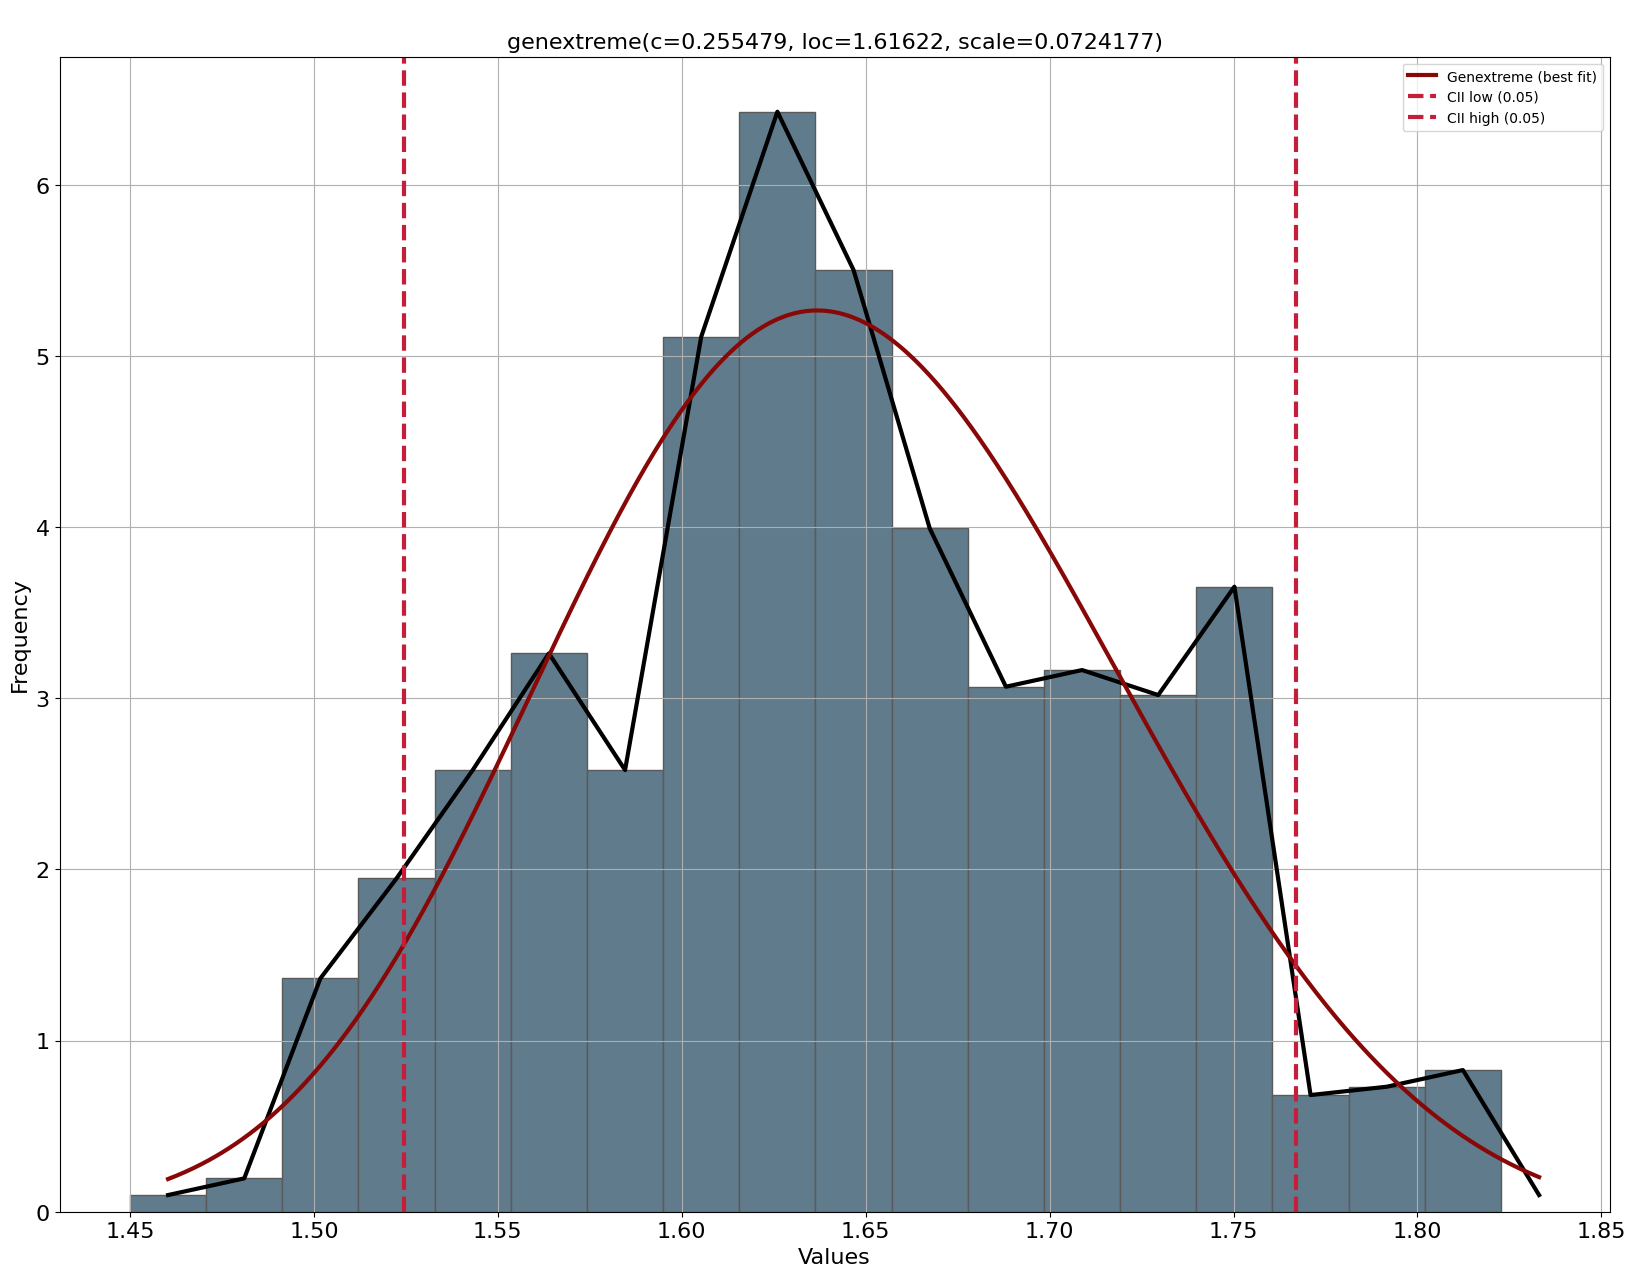

In [125]:
# Initialize distfit
dist = distfit()

# Fit the distribution to your BMI data
dist.fit_transform(obesity_female_over18['Height'])

# Print the summary of the best fit distribution
print(dist.summary)

# Optionally, you can also plot the best fit distribution against your data
dist.plot()

<Figure size 1000x600 with 0 Axes>

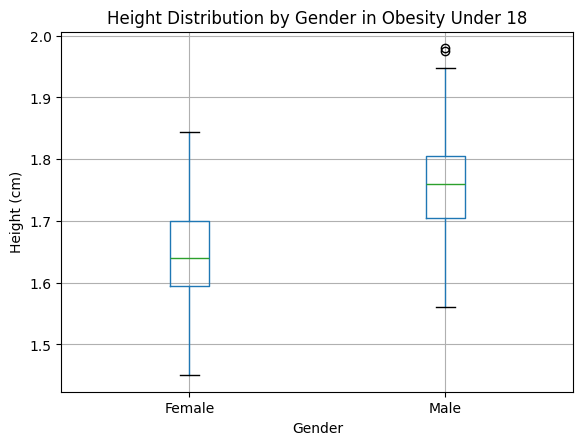

In [122]:
# Concatenate the DataFrames
obesity_data_combined = pd.concat([obesity_female_over18, obesity_male_over18])

# Plotting
plt.figure(figsize=(10, 6))  # Adjusts the size of your figure
boxplot = obesity_data_combined.boxplot(column='Height', by='Gender')
plt.title('Height Distribution by Gender in Obesity Under 18')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Gender' title
plt.xlabel('Gender')
plt.ylabel('Height (cm)')
plt.show()

In [123]:
stats.ttest_ind(a= obesity_female_over18['Height'],
                b= obesity_male_over18['Height'],
                equal_var=True)    # Assume samples have equal variance?

TtestResult(statistic=-34.89065242840878, pvalue=1.1947901551807517e-208, df=1996.0)